/Users/edwajohn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log2


(min - max): 0.0 - 3.624017739016889


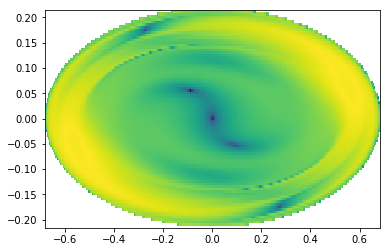

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp

def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy = -0.1
num_bounces = 4
p_theta = np.sqrt((energy + 1/3)*2)
p_phi = np.sqrt((energy + 1/3)/5)

full = True

if full:
    p_theta_start = -p_theta
    p_theta_end = p_theta
    p_phi_start = -p_phi
    p_phi_end = p_phi
    h = 0.005
else:
    p_theta_start = -0.095
    p_theta_end = -0.085
    p_phi_start = 0.053
    p_phi_end = 0.055
    h = 0.0001
#     p_theta_start = -0.050
#     p_theta_end = 0.01
#     p_phi_start = 0.030
#     p_phi_end = 0.034
#     h = 0.0001

x_range = np.arange(p_theta_start, p_theta_end, h)
y_range = np.arange(p_phi_start, p_phi_end, h)

x, y = np.meshgrid(x_range, y_range)

# %time z = vf(x,y)
z = vf(x,y)

vz = np.log2((z-np.nanmin(z))/(np.nanmax(z)-np.nanmin(z)))
h = plt.pcolor(x,y,vz)

print('(min - max): {} - {}'.format(np.nanmin(z), np.nanmax(z)))

# iPyWidgets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp
from ipywidgets import interactive, interact, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def f(x,y,energy,num_bounces):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy_widget = widgets.FloatSlider(min=-1/3, max=0, step=0.05, value=-1/4, description='Energy:')
num_bounces_widget = widgets.IntSlider(min=1, max=5, value=3, description='Num bounces:')
h_widget = widgets.FloatSlider(min=0.001, max=0.1, step=0.0005, value=0.01, readout_format='.3f', description='H:')
p_theta_widget = widgets.FloatSlider(min=0, max=0.8, step=0.001, value=0.3)
p_phi_widget = widgets.FloatSlider(min=0, max=0.8, step=0.001, value=0.3)

# def update_p_theta_range(*args):
#     p_theta_widget.max = np.sqrt((energy_widget.value + 1/3)*2)
# energy_widget.observe(update_p_theta_range, 'value')

# def update_p_phi_range(*args):
#     p_phi_widget.max = np.sqrt((energy_widget.value + 1/3)/5)
# energy_widget.observe(update_p_phi_range, 'value')

def func(energy, num_bounces, h, p_theta, p_phi):
#     p_theta = np.sqrt((energy + 1/3)*2)
#     p_phi = np.sqrt((energy + 1/3)/5)
#     x_range = np.arange(-p_theta, p_theta, h)
#     y_range = np.arange(-p_phi, p_phi, h)
    x_range = np.arange(-p_theta, p_theta, h)
    y_range = np.arange(-p_phi, p_phi, h)
    x, y = np.meshgrid(x_range, y_range)
    z = vf(x,y,energy,num_bounces)
#     z = f(x,y,energy,num_bounces)
    plt.pcolor(x,y,z)
    plt.colorbar()

w = interactive(func, energy=energy_widget, num_bounces=num_bounces_widget, h=h_widget, p_theta=p_theta_widget, p_phi=p_phi_widget)
display(w)

interactive(children=(FloatSlider(value=-0.25, description='Energy:', max=0.0, min=-0.3333333333333333, step=0…

# Find all local minima

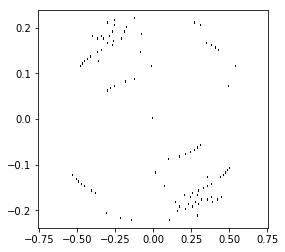

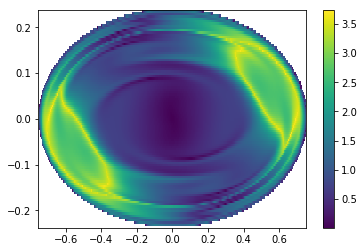

(min - max): 0.006503982684280844 - 3.7317585062174214
pr: 0.353133853244297
ptheta: 0.29722734729091993
pphi: -0.1880476142847616
fval: 0.031208865726172673

pr: 0.4844125444626916
ptheta: 0.2572273472909199
pphi: -0.16304761428476158
fval: 0.020155067174353565

pr: 0.47805029743534494
ptheta: 0.29722734729091993
pphi: -0.15804761428476158
fval: 0.10448858590276011

pr: 0.6918760093543834
ptheta: 0.10222734729091976
pphi: -0.08804761428476152
fval: 0.024829419623546168

pr: 0.7527422274350036
ptheta: -0.0027726527090803366
pphi: 0.0019523857152385637
fval: 0.006503982684280844

pr: 0.689917653490419
ptheta: -0.12277265270908044
pphi: 0.08695238571523864
fval: 0.018454395321995505

pr: 0.4823678272223742
ptheta: -0.26777265270908057
pphi: 0.1619523857152387
fval: 0.018206463141564527

pr: 0.35423642132335736
ptheta: -0.3027726527090806
pphi: 0.18695238571523873
fval: 0.044448238413123134



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp

def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy = -0.05
num_bounces = 3
p_theta = np.sqrt((energy + 1/3)*2)
p_phi = np.sqrt((energy + 1/3)/5)

full = True

if full:
    p_theta_start = -p_theta
    p_theta_end = p_theta
    p_phi_start = -p_phi
    p_phi_end = p_phi
    h = 0.005
else:
    p_theta_start = 0.257
    p_theta_end = 0.337
    p_phi_start = -0.218
    p_phi_end = -0.158
    h = 0.0001

x_range = np.arange(p_theta_start, p_theta_end, h)
y_range = np.arange(p_phi_start, p_phi_end, h)

x, y = np.meshgrid(x_range, y_range)

# %time z = vf(x,y)
z = vf(x,y)

grid_image = np.ones((z.shape[0], z.shape[1], 3))
minima = []
for i in np.arange(x.shape[0]):
    for j in np.arange(x.shape[1]):
        try:
            top_left = z[i - 1, j - 1]
        except IndexError:
            top_left = 100
        try:
            top = z[i - 1, j]
        except IndexError:
            top = 100
        try:
            top_right = z[i - 1, j + 1]
        except IndexError:
            top_right = 100
        try:
            left = z[i, j - 1]
        except IndexError:
            left = 100
        try:
            right = z[i, j + 1]
        except IndexError:
            right = 100
        try:
            bottom_left = z[i + 1, j - 1]
        except IndexError:
            bottom_left = 100
        try:
            bottom = z[i + 1, j]
        except IndexError:
            bottom = 100
        try:
            bottom_right = z[i + 1, j + 1]
        except IndexError:
            bottom_right = 100
        
        if (z[i, j] < top_left) \
            and (z[i, j] < top) \
            and (z[i, j] < top_right) \
            and (z[i, j] < left) \
            and (z[i, j] < right) \
            and (z[i, j] < bottom_left) \
            and (z[i, j] < bottom) \
            and (z[i, j] < bottom_right):
            grid_image[i, j, :] = [0, 0, 0]
            minima.append((x[i,j], y[i,j], z[i,j]))
            
h1 = plt.imshow(grid_image, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
plt.show()
h2 = plt.pcolor(x,y,z)
plt.colorbar()
plt.show()

print('(min - max): {} - {}'.format(np.nanmin(z), np.nanmax(z)))

for row in minima:
    if abs(row[2] - np.nanmin(z)) < 0.1:
        print('pr:', np.sqrt(2*energy + 2/3 - row[0]**2 - 10*row[1]**2))
        print('ptheta:', row[0])
        print('pphi:', row[1])
        print('fval:', row[2])
        print()

# Identify minima of interest

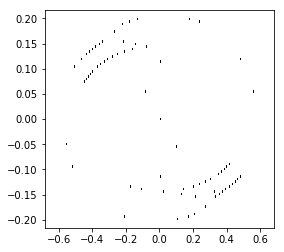

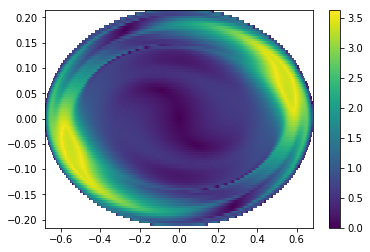

(min - max): 0.0 - 3.626431601151047


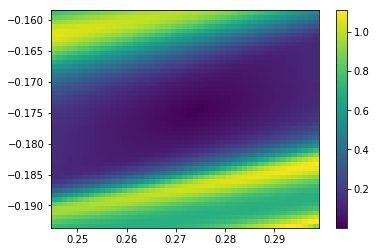

(min - max): 0.0012935657220203682 - 1.1080101539441027


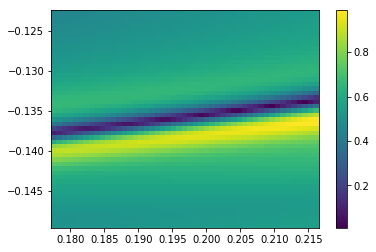

(min - max): 0.009434944284631656 - 0.9947093360618169


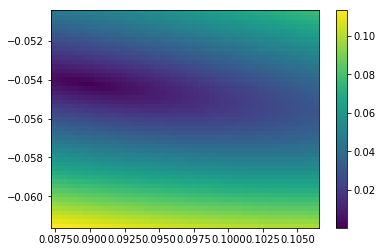

(min - max): 0.00038887505017189345 - 0.1131511164852901


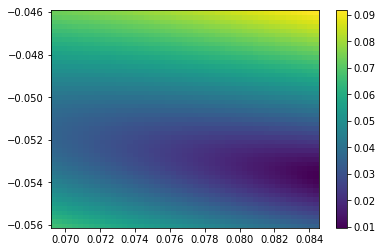

(min - max): 0.009050351095939591 - 0.09430690604134764


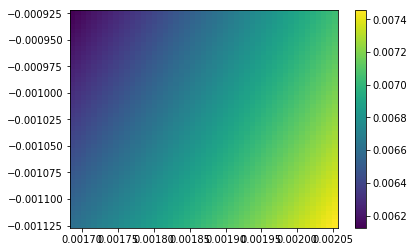

(min - max): 0.006115437652136848 - 0.007473611080059854


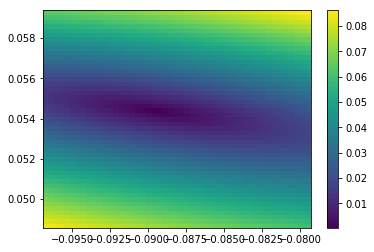

(min - max): 0.000320288615214667 - 0.09000373982750916


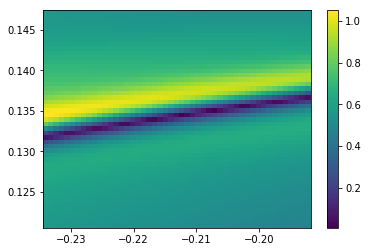

(min - max): 0.008034491852833208 - 1.0499102036935075


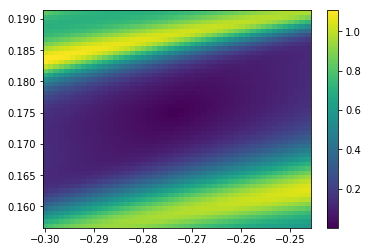

(min - max): 0.0007893918139888601 - 1.1057630510100822


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import magphyxp

def f(x,y):
    pr = 2*energy + 2/3 - x**2 - 10*y**2
    if pr >= 0:
        return magphyxp.period(x, y, num_bounces, energy)
    return np.nan

vf = np.vectorize(f)

energy = -0.1
num_bounces = 4
p_theta = np.sqrt((energy + 1/3)*2)
p_phi = np.sqrt((energy + 1/3)/5)

full = True

if full:
    p_theta_start = -p_theta
    p_theta_end = p_theta
    p_phi_start = -p_phi
    p_phi_end = p_phi
    h = 0.005
else:
    p_theta_start = 0.257
    p_theta_end = 0.337
    p_phi_start = -0.218
    p_phi_end = -0.158
    h = 0.0001

x_range = np.arange(p_theta_start, p_theta_end, h)
y_range = np.arange(p_phi_start, p_phi_end, h)

x, y = np.meshgrid(x_range, y_range)

# %time z = vf(x,y)
z = vf(x,y)

grid_image = np.ones((z.shape[0], z.shape[1], 3))
minima = []
for i in np.arange(x.shape[0]):
    for j in np.arange(x.shape[1]):
        try:
            top_left = z[i - 1, j - 1]
        except IndexError:
            top_left = 100
        try:
            top = z[i - 1, j]
        except IndexError:
            top = 100
        try:
            top_right = z[i - 1, j + 1]
        except IndexError:
            top_right = 100
        try:
            left = z[i, j - 1]
        except IndexError:
            left = 100
        try:
            right = z[i, j + 1]
        except IndexError:
            right = 100
        try:
            bottom_left = z[i + 1, j - 1]
        except IndexError:
            bottom_left = 100
        try:
            bottom = z[i + 1, j]
        except IndexError:
            bottom = 100
        try:
            bottom_right = z[i + 1, j + 1]
        except IndexError:
            bottom_right = 100
        
        if (z[i, j] < top_left) \
            and (z[i, j] < top) \
            and (z[i, j] < top_right) \
            and (z[i, j] < left) \
            and (z[i, j] < right) \
            and (z[i, j] < bottom_left) \
            and (z[i, j] < bottom) \
            and (z[i, j] < bottom_right):
            grid_image[i, j, :] = [0, 0, 0]
            minima.append((x[i,j], y[i,j], z[i,j]))
            
h1 = plt.imshow(grid_image, aspect=3, extent=(p_theta_start, p_theta_end, p_phi_start, p_phi_end), origin='lower')
plt.show()
h2 = plt.pcolor(x,y,z)
plt.colorbar()
plt.show()

print('(min - max): {} - {}'.format(np.nanmin(z), np.nanmax(z)))
good_minima = []
for row in minima:
    if abs(row[2] - np.nanmin(z)) < 0.1:
        good_minima.append(row)

# zoom in around each good point and see if minima gets any smaller
for row in good_minima:
    x_range = np.linspace(row[0]-abs(0.1*row[0]),row[0]+abs(0.1*row[0]),50)
    y_range = np.linspace(row[1]-abs(0.1*row[1]),row[1]+abs(0.1*row[1]),50)
    x, y = np.meshgrid(x_range,y_range)
    z = vf(x,y)
    h = plt.pcolor(x,y,z)
    plt.colorbar()
    plt.show()
    print('(min - max): {} - {}'.format(np.nanmin(z), np.nanmax(z)))
